In [2]:
# parsing=pd.read_excel("Data_TSUM.xlsx",sheet_name="Data_Parsing")
#company=pd.read_excel("Data_TSUM.xlsx",sheet_name="Data_Company")

Valentino       25
Brioni          25
Stone Island    25
Name: brand, dtype: int64

96.3

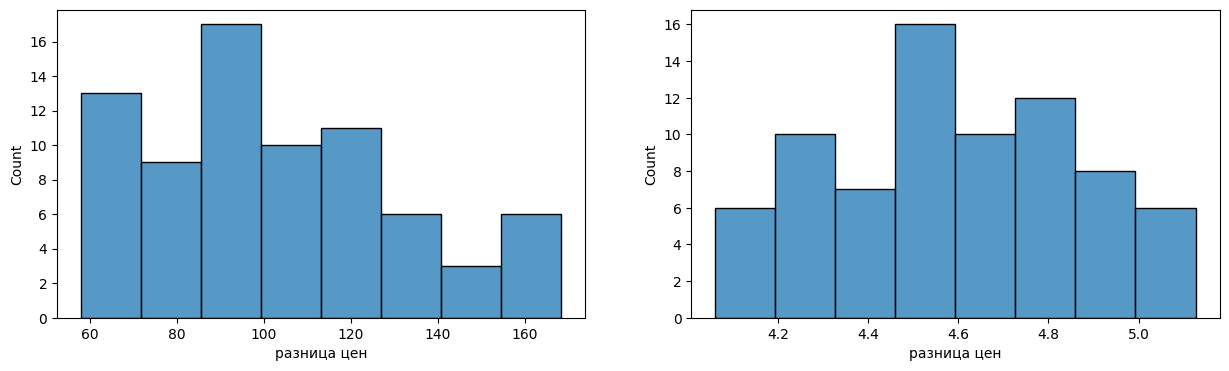

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


parcing = pd.read_csv('data/data_parcing.csv', sep = ';')
company = pd.read_csv('data/Data_company.csv', sep = ';')
parcing = parcing[['brand', 'Category', 'producer_id', 'producer_color','price']]
company = company[['brand', 'Category', 'item_id', 'color_id','current price']]


parcing = parcing.replace(to_replace= ['_', '-', '~', '/', '\\\\'] , value='', regex=True)
parcing.rename(columns = {'producer_id' : 'item_id', 'price' : 'цена_конкурентов'}, inplace = True)
company.rename(columns = {'current price' : 'наша цена'}, inplace = True)
company = company[['item_id', 'color_id', 'наша цена']]
table = parcing.merge(company, how = 'outer', on = 'item_id')
table = table.drop('color_id', axis = 1)
table['разница цен'] = round(table['цена_конкурентов']/table['наша цена']*100,1)
display(table['brand'].value_counts())


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot1 = sns.histplot(data = table, x= 'разница цен' ,ax=axes[0])

log_table = np.log(table['разница цен'])
histplot11 = sns.histplot(data =log_table, ax=axes[1])
display(table['разница цен'].median())

Число выбросов по методу Тьюки: 2
Результирующее число записей: 23


,brand,Category,item_id,producer_color,цена_конкурентов,наша цена,разница цен
4,Valentino,Shoes,aaaaa111115,black,250,153,163.4
12,Valentino,Shoes,aaaaa111123,white,288,171,168.4


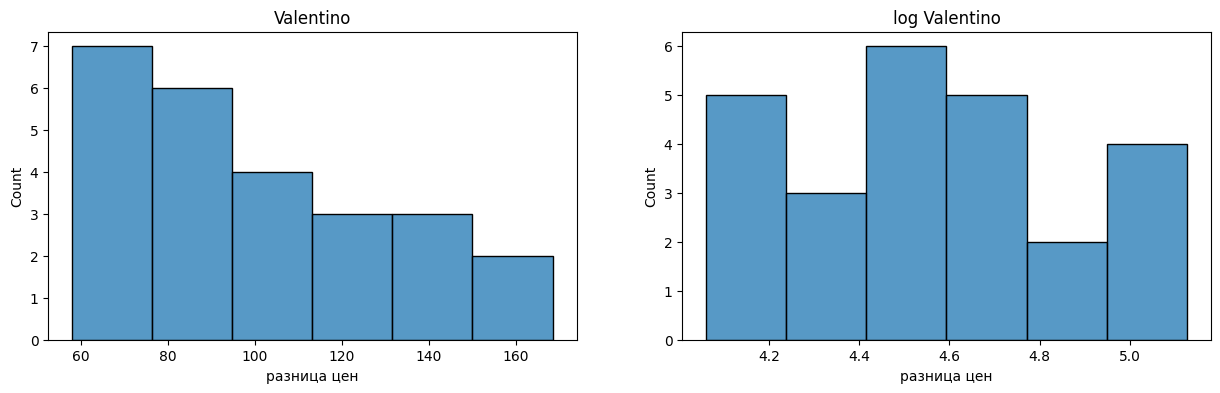

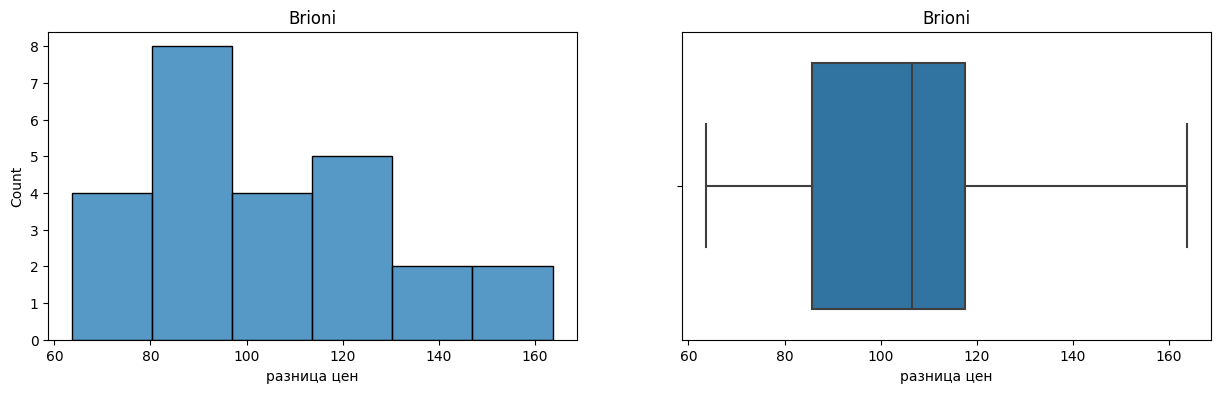

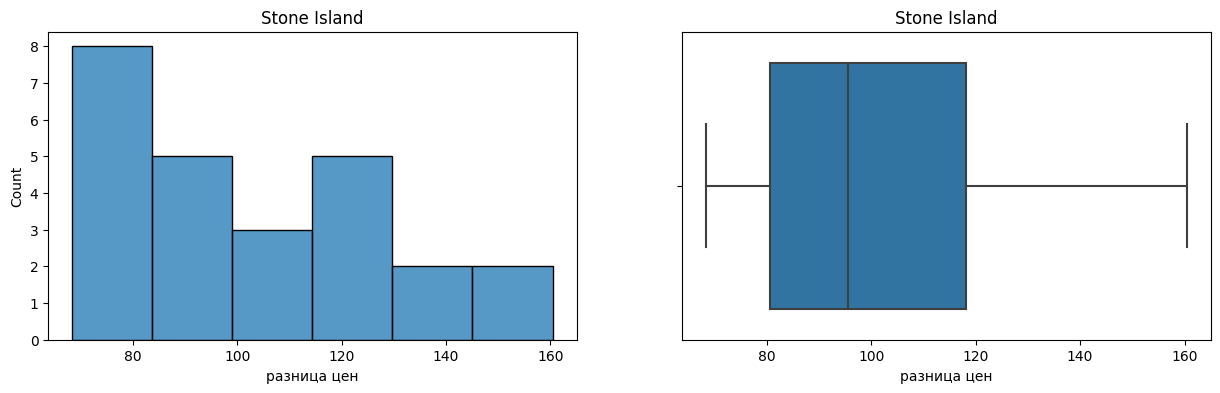

In [5]:


#рисуем распределение и логарфм распределение для валентино
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
mask1 = table[table['brand']== 'Valentino']
histplot1 = sns.histplot(data = mask1, x= 'разница цен' ,ax=axes1[0])
log_mask1 = np.log(mask1['разница цен'])
histplot11 = sns.histplot(data =log_mask1, ax=axes1[1])
histplot1.set_title('Valentino');
histplot11.set_title('log Valentino');



def outliers_iqr_mod(data, feature, log_scale = False, left = 1.5, right= 1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr *left )
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers_Valentino, cleaned_Valentino= outliers_iqr_mod(mask1, 'разница цен', True, 0.5,0.5)
print(f'Число выбросов по методу Тьюки: {outliers_Valentino.shape[0]}')
print(f'Результирующее число записей: {cleaned_Valentino.shape[0]}')
display(outliers_Valentino)

fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
mask2 = table[table['brand']== 'Brioni']
histplot2 = sns.histplot(data= mask2, x='разница цен', ax=axes2[0]);
boxplot2 = sns.boxplot(data=mask2, x='разница цен', ax=axes2[1]);
boxplot2.set_title('Brioni')
histplot2.set_title('Brioni');

fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
mask3 = table[table['brand']== 'Stone Island']
histplot3 = sns.histplot(data= mask3, x='разница цен', ax=axes3[0]);
boxplot3 = sns.boxplot(data=mask3, x='разница цен', ax=axes3[1]);
boxplot3.set_title('Stone Island')
histplot3.set_title('Stone Island');